# Introduction

The National UFO Reporting Center (NUFORC) has been in operation since 1974. In their own words, "The Center’s primary function over the past five decades has been to receive, record, and to the greatest degree possible, corroborate and document reports from individuals who have been witness to unusual, possibly UFO-related events". They make no claims as to the validity of the information in any of these reports.  They have omitted any of the obvious hoaxes, however most reports have been posted exactly as received in the author’s own words. Their full database contains over 147,000 entries, but we chose a more concise version.

For our project we chose a dataset of recorded UFO sightings. We found this dataset at https://corgis-edu.github.io/corgis/python/ufo_sightings/. However, the data for the set comes from the  (https://nuforc.org/). The data was taken from the the NUFORC, was cleaned and uplaoed to GitHub by Sigmonf Axel. The dataset contains over 80,000 entries from around the world.

We chose this dataset because we are intrigued by UFOs and how we can interact with them. We had questions such as Where are we most likely to see a UFO? Where are we most likely to see a _____ shaped UFO? Where are we most likely to have our longest encounter? What if we want our encounter to be at a certain time of day? If we go to a certain place, what is the most likely shape of a UFO? 

# Materials

Our dataset consists of 11 columns, and 80,332 entries. The attriubtes are: date_time, city_area, state, country, ufo_shape, encounter_length, described_encounter_length, description, date_documented, latitude, and longitude. Most of these are self explanatory, but some could use fome further explanation. 

- "date_time" is the day, month, year, and time of day that the encounter happened, but "date_documented" is the date that the encounter was reproted to the NUFORC. The difference between these ranges from 0 days to many years. 
    
- "described_encounter_length" is the length of the encounter as reported by the party reporting it. Often this contains text, such as "30 seconds", or "1-2 hours". "encounter_length" takes the value from the described encounter length and converts it to seconds. In cases where a time range is given, the ceiling of that range is taken for the encounter_length".

Our data was already very clean when we started. Many of the "important" attributes have very few missing values. Importance is relative in this case. While there are lots of missing values in the "country" column, there is only 1 missing value in the "latitude" and "longitude" columns. Since latitude and longitude can be used to find the exact location of the encounter, they are more important than the "city_area", "state", and "country" attributes which means we can worry less about those missing values.

In [1]:
import pandas as pd

In [2]:
ufos = pd.read_csv("ufo_sightings.csv");

In [3]:
ufos.head()

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [4]:
ufos.shape

(80332, 11)

# Methods

In [5]:
ufos.iloc[50:100];

In [6]:
import pandas as pd
import re

# Function to extract numeric values and units
def extract_numeric(text):
    match = re.search(r'(\d+)\s*(?:\s*(\d+))?\s*(\w+)?', str(text))
    if match:
        if match.group(2):
            return {'numeric': (int(match.group(1)) + int(match.group(2))) / 2, 'unit': match.group(3)}
        else:
            return {'numeric': int(match.group(1)), 'unit': match.group(3)}
    return None

# Function to standardize units
def standardize_units(row):
    numeric_duration = row['numeric_duration']
    if numeric_duration is not None:
        duration = numeric_duration.get('numeric')
        unit = str(numeric_duration.get('unit')).lower()

        if unit in ['sec', 'second', 'seconds']:
            return duration
        elif unit in ['min', 'minute', 'minutes']:
            return duration * 60
        elif unit in ['hour', 'hours']:
            return duration * 3600
    return None

# Apply the extract_numeric function to create a new column with numeric values and units
ufos['numeric_duration'] = ufos['described_encounter_length'].apply(extract_numeric)

# Apply the standardize_units function to create a new column with standardized durations
ufos['standardized_duration'] = ufos.apply(standardize_units, axis=1)

# Display the cleaned and standardized DataFrame
print(ufos[['described_encounter_length', 'standardized_duration']])


      described_encounter_length  standardized_duration
0                     45 minutes                 2700.0
1                        1-2 hrs                    NaN
2                     20 seconds                   20.0
3                       1/2 hour                    NaN
4                     15 minutes                  900.0
...                          ...                    ...
80327                 10 minutes                  600.0
80328                 20 minutes                 1200.0
80329                       hour                    NaN
80330                  5 seconds                    5.0
80331                 17 minutes                 1020.0

[80332 rows x 2 columns]


In [7]:
ufos['standardized_duration'].describe()

count     57894.000000
mean        806.594267
std        3612.173472
min           0.000000
25%          30.000000
50%         180.000000
75%         600.000000
max      345600.000000
Name: standardized_duration, dtype: float64

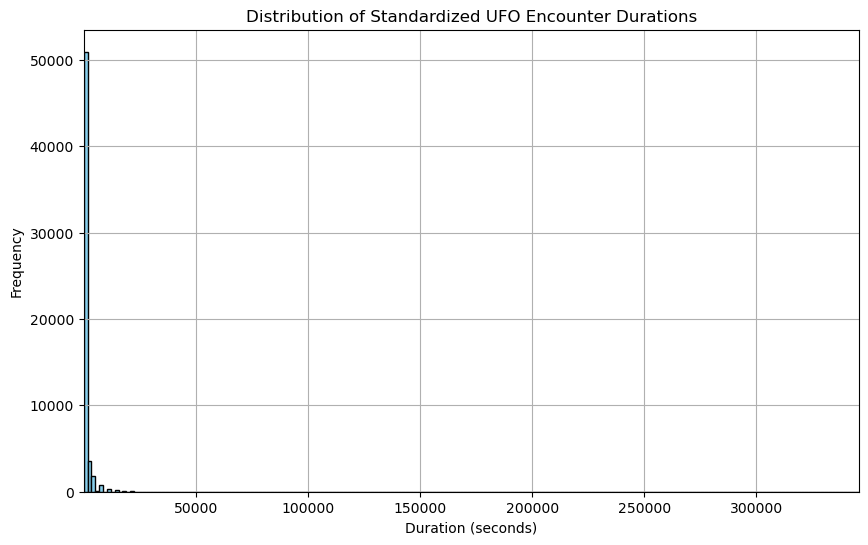

In [8]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ufos['standardized_duration'], bins=200, color='skyblue', edgecolor='black')

plt.xlim(1, 345600)  # Adjust the values according to your needs

plt.title('Distribution of Standardized UFO Encounter Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

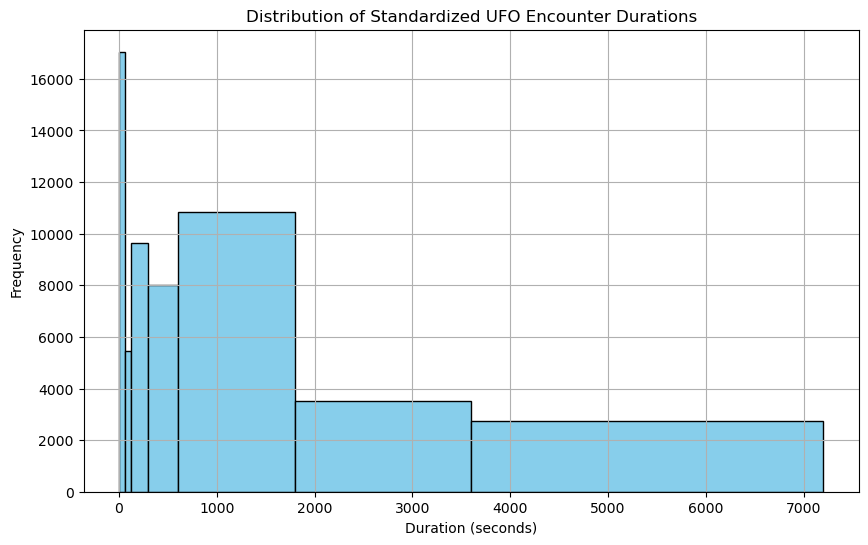

In [9]:
import matplotlib.pyplot as plt

# Plotting the histogram with custom bins
plt.figure(figsize=(10, 6))
plt.hist(ufos['standardized_duration'], bins=[0, 60, 120, 300, 600, 1800, 3600, 7200], color='skyblue', edgecolor='black')
#plt.xscale('log')  # Use a logarithmic scale for better visibility if the range is still too large
plt.title('Distribution of Standardized UFO Encounter Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

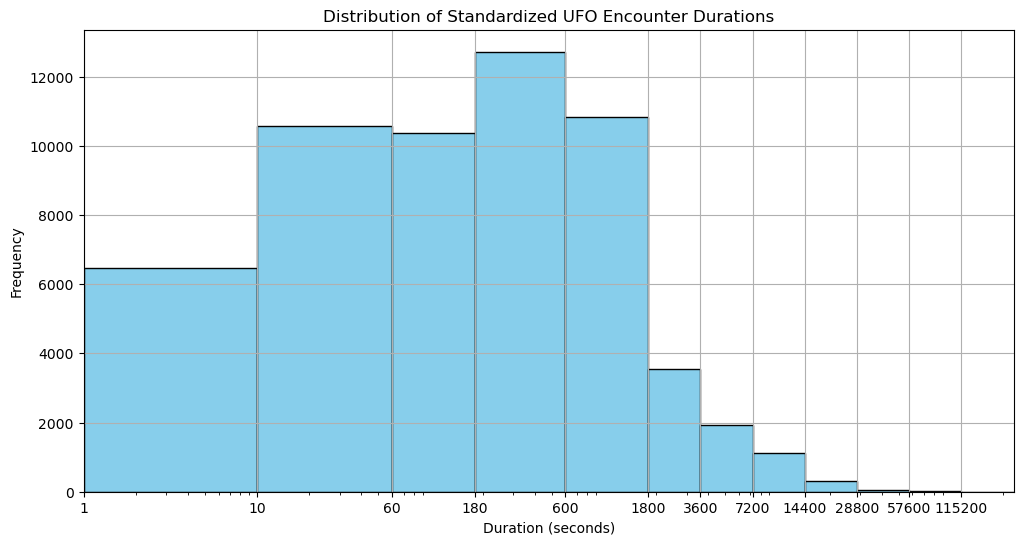

In [10]:
import matplotlib.pyplot as plt

# Plotting the histogram with custom bins, logarithmic scale, and custom x-axis labels
plt.figure(figsize=(12, 6))

# Create a histogram with logarithmic scale and custom bins
plt.hist(ufos['standardized_duration'], bins=[1, 10, 60, 180, 600, 1800, 3600, 7200, 14400, 28800, 57600, 115200, 230400], color='skyblue', edgecolor='black')
plt.xscale('log')

# Set custom x-axis limits
plt.xlim(1, 230400)

# Set custom tick locations and labels
tick_locations = [1, 10, 60, 180, 600, 1800, 3600, 7200, 14400, 28800, 57600, 115200]
tick_labels = [str(val) for val in tick_locations]

plt.xticks(tick_locations, tick_labels)

plt.title('Distribution of Standardized UFO Encounter Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is 'column_name'
nan_count = ufos['encounter_length'].isna().sum()

print(f"The number of NaN values in the column 'column_name' is: {nan_count}")


The number of NaN values in the column 'column_name' is: 3


In [12]:
ufos.iloc[300:310, :]

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,numeric_duration,standardized_duration
300,10/11/1998 20:30,highland,in,us,sphere,14400.0,4 hrs +,Spherical. Red&#44 yellow&#44 and green light...,11/1/1998,39.794444,-87.395833,"{'numeric': 4, 'unit': 'hrs'}",NaN
301,10/11/1998 22:40,bar harbor (bar island crossover),me,us,sphere,30.0,30 seconds,My friend Steven and I were crossing over to B...,11/1/1998,44.387500,-68.204444,"{'numeric': 30, 'unit': 'seconds'}",30.0
302,10/11/1998 22:45,elk grove,ca,us,fireball,4.0,4 seconds,Greenish blue fireball streaking across horizon,11/1/1998,38.408889,-121.370556,"{'numeric': 4, 'unit': 'seconds'}",4.0
303,10/11/1999 00:15,montgomery,al,us,light,180.0,3 minutes,Bright light coming from back yard and a surre...,3/21/2003,32.366667,-86.300000,"{'numeric': 3, 'unit': 'minutes'}",180.0
304,10/11/1999 04:30,los angeles,ca,us,light,300.0,5min,It was a large bright light sitting stationary...,10/19/1999,34.052222,-118.242778,"{'numeric': 5, 'unit': 'min'}",300.0
305,10/11/1999 06:10,somerset?,wi,NaN,unknown,120.0,2 minutes,Huge pulsating red light over I-94. High over...,10/19/1999,45.124411,-92.673537,"{'numeric': 2, 'unit': 'minutes'}",120.0
306,10/11/1999 07:40,three rivers,mi,us,oval,600.0,10minuets,While dirving to work this monday morning the ...,10/19/1999,41.943889,-85.632500,"{'numeric': 10, 'unit': 'minuets'}",NaN
307,10/11/1999 09:10,canby,or,us,light,10.0,10 seconds,i saw bright light come out of clouds&#44 2 ai...,10/19/1999,45.263056,-122.691389,"{'numeric': 10, 'unit': 'seconds'}",10.0
308,10/11/1999 18:00,parry sound (near) (canada),on,ca,disk,6.0,6 seconds,A silvery disk shaped object&#44 flew over an ...,4/22/2003,45.333333,-80.033333,"{'numeric': 6, 'unit': 'seconds'}",6.0
309,10/11/1999 20:15,portville,ny,us,oval,30.0,30 seconds,The object was just below the tree line. The o...,10/19/1999,42.038611,-78.341111,"{'numeric': 30, 'unit': 'seconds'}",30.0


# Results

# Conclusion

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coordinates_df = ufos[['latitude', 'longitude']]



coordinates_df = coordinates_df.dropna()

coordinates_df.head()

nan_count = coordinates_df.isna().sum()
print(nan_count)


scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_df)

latitude     0
longitude    0
dtype: int64


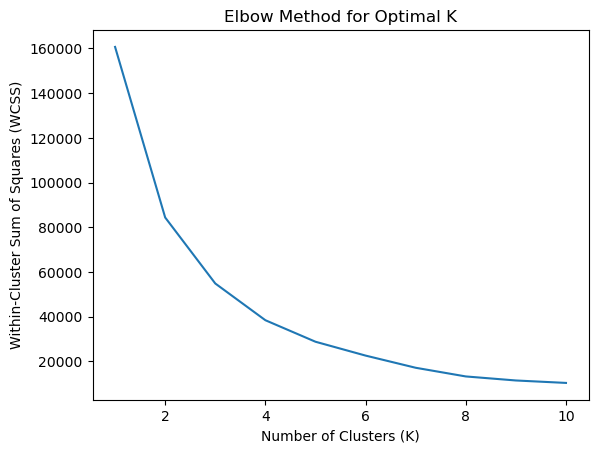

In [14]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [15]:
# Let's say the optimal K is 4 (as an example)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
coordinates_df['cluster'] = kmeans.fit_predict(coordinates_scaled)

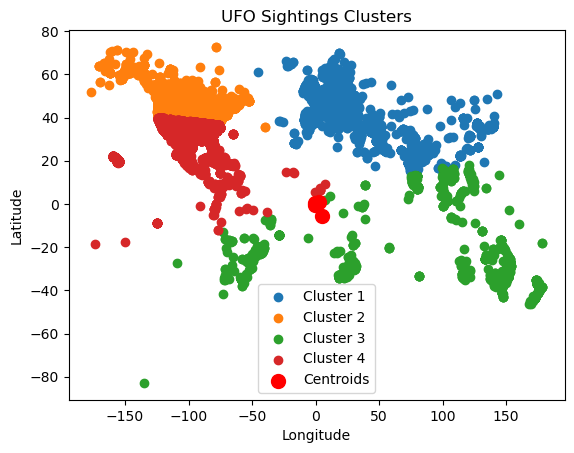

In [16]:
# Scatter plot for each cluster
for cluster in range(optimal_k):
    cluster_df = coordinates_df[coordinates_df['cluster'] == cluster]
    plt.scatter(cluster_df['longitude'], cluster_df['latitude'], label=f'Cluster {cluster + 1}')

# Plot the centroids if needed
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='red', label='Centroids')

plt.title('UFO Sightings Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
data = ufos[['latitude', 'longitude', 'ufo_shape']]

# Drop missing values if any
data = data.dropna()

# Encode categorical variable 'ufo_shape'
le = LabelEncoder()
data['ufo_shape'] = le.fit_transform(data['ufo_shape'])

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude']]
y = data['ufo_shape']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.16
              precision    recall  f1-score   support

           1       0.04      0.01      0.02       373
           2       0.02      0.01      0.01       191
           3       0.06      0.03      0.04       401
           4       0.11      0.10      0.10      1545
           5       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        56
           8       0.07      0.03      0.04       273
          10       0.03      0.01      0.02       236
          11       0.10      0.07      0.08      1088
          13       0.03      0.01      0.02       162
          14       0.11      0.08      0.09      1206
          16       0.06      0.03      0.04       267
          17       0.07      0.04      0.05       488
          19       0.22      0.51      0.30      3229
          20       0.11      0.06      0.08      1156
          21       0.06      0.03      0.04       706
          23       0.05      0.02      0.03       272
          24

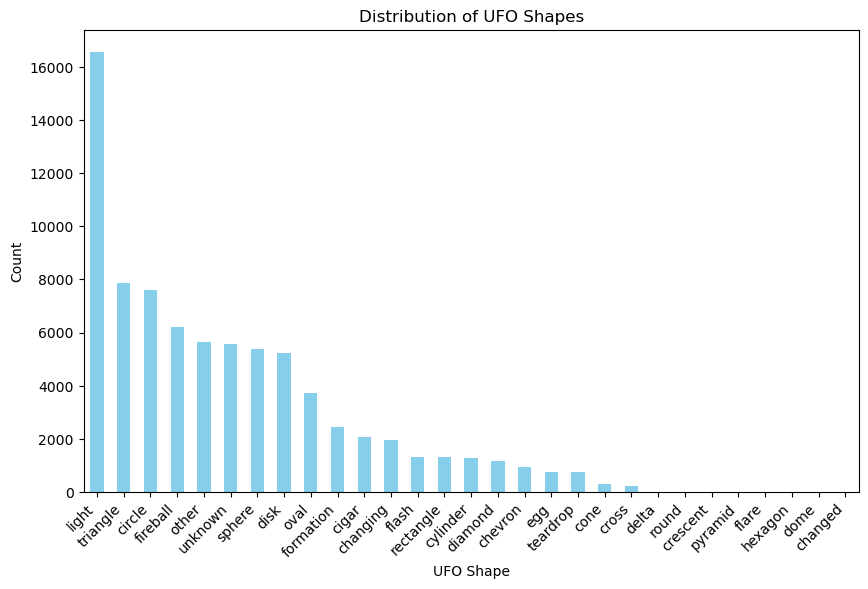

In [21]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shapes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

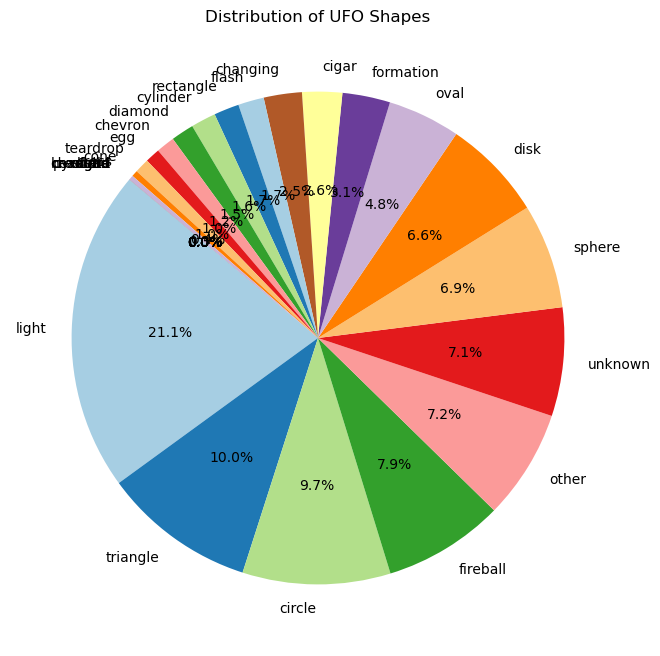

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes using a pie chart
plt.figure(figsize=(8, 8))
ufo_shape_counts = ufo_shapes.value_counts()
plt.pie(ufo_shape_counts, labels=ufo_shape_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of UFO Shapes')
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your DataFrame is named 'df'
data = ufos[['latitude', 'longitude', 'ufo_shape']]

# Drop missing values if any
data = data.dropna()

# Encode categorical variable 'ufo_shape'
le = LabelEncoder()
data['ufo_shape'] = le.fit_transform(data['ufo_shape'])

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude']]
y = data['ufo_shape']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = dict(zip(range(len(le.classes_)), 1 / ((y_train.value_counts() / len(y_train)).sort_index().values)))

# Create a Random Forest classifier with class weights
clf = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.07
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.08      0.05       373
           2       0.01      0.07      0.02       191
           3       0.04      0.05      0.05       401
           4       0.12      0.06      0.08      1545
           5       0.01      0.07      0.01        73
           6       0.00      0.00      0.00         0
           7       0.01      0.07      0.01        56
           8       0.03      0.09      0.05       273
           9       0.00      0.00      0.00         0
          10       0.03      0.09      0.05       236
          11       0.09      0.06      0.07      1088
          13       0.01      0.06      0.02       162
          14       0.11      0.06      0.08      1206
          15       0.00      0.00      0.00         0
          16       0.03      0.07      0.04       267
          17       0.06      0.09      0.07       488
          18

/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your DataFrame is named 'df'
data = ufos[['latitude', 'longitude', 'date_time', 'ufo_shape']]

# Drop missing values if any
data= data.dropna()

# Handle "24:00" in date_time
data['date_time'] = data['date_time'].str.replace('24:00', '00:00')

# Feature Engineering for 'date_time'
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data['minute'] = data['date_time'].dt.minute

# Encode categorical variable 'ufo_shape'
le = LabelEncoder()
data['ufo_shape'] = le.fit_transform(data['ufo_shape'])

# Drop the original 'date_time' column
data.drop('date_time', axis=1, inplace=True)

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude', 'year', 'month', 'day', 'hour', 'minute']]
y = data['ufo_shape']

# Standardize numerical features
scaler = StandardScaler()
X[['latitude', 'longitude', 'year', 'month', 'day', 'hour', 'minute']] = scaler.fit_transform(X[['latitude', 'longitude', 'year', 'month', 'day', 'hour', 'minute']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))


/var/folders/jz/b8ydxt_56qlcmx1pvfyjs5jc0000gn/T/ipykernel_10925/3812626329.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['latitude', 'longitude', 'year', 'month', 'day', 'hour', 'minute']] = scaler.fit_transform(X[['latitude', 'longitude', 'year', 'month', 'day', 'hour', 'minute']])


Accuracy: 0.20
              precision    recall  f1-score   support

           1       0.13      0.04      0.06       373
           2       0.10      0.02      0.03       191
           3       0.11      0.04      0.06       401
           4       0.14      0.11      0.12      1545
           5       0.00      0.00      0.00        73
           7       0.17      0.02      0.03        56
           8       0.06      0.02      0.03       273
          10       0.13      0.03      0.04       236
          11       0.19      0.20      0.20      1088
          13       0.23      0.03      0.05       162
          14       0.20      0.18      0.19      1206
          16       0.14      0.03      0.04       267
          17       0.21      0.06      0.09       488
          19       0.24      0.61      0.35      3229
          20       0.12      0.06      0.08      1156
          21       0.10      0.05      0.06       706
          23       0.16      0.03      0.05       272
          24

/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camp-ellie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# After fitting the model, print feature importances
feature_importances = clf.feature_importances_
features = X.columns

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


     Feature  Importance
1  longitude    0.209203
0   latitude    0.208305
4        day    0.155808
2       year    0.128105
3      month    0.107393
5       hour    0.100000
6     minute    0.091186


In [26]:
import pandas as pd

# Assuming your DataFrame is named 'df'
data = ufos[['ufo_shape', 'state', 'encounter_length']]

# Drop missing values if any
data = data.dropna()

# Convert 'encounter_length' to categorical bins for association rule mining
data['encounter_length'] = pd.cut(data['encounter_length'], bins=[0, 60, 300, float('inf')], labels=['Short', 'Medium', 'Long'])

# Function to generate frequent itemsets
def generate_frequent_itemsets(data, min_support):
    itemsets = {}
    num_transactions = len(data)

    # Initialize itemsets with single items
    for column in data.columns:
        itemsets[frozenset([column])] = sum(data[column] == 1) / num_transactions

    # Generate frequent itemsets
    k = 2
    while True:
        new_itemsets = {}
        for itemset1, support1 in itemsets.items():
            for itemset2, support2 in itemsets.items():
                if len(itemset1.union(itemset2)) == k:
                    combined_support = sum((data[list(itemset1.union(itemset2))].sum(axis=1) == k).astype(int)) / num_transactions
                    if combined_support >= min_support:
                        new_itemsets[itemset1.union(itemset2)] = combined_support

        if not new_itemsets:
            break

        itemsets = new_itemsets
        k += 1

    return itemsets

# Function to generate association rules
def generate_association_rules(itemsets, min_confidence):
    rules = []
    for itemset, support in itemsets.items():
        if len(itemset) > 1:
            for item in itemset:
                antecedent = frozenset([item])
                consequent = itemset - antecedent
                confidence = support / itemsets[antecedent]
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, support, confidence))

    return rules

# Convert categorical variables to binary (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['ufo_shape', 'state', 'encounter_length'], prefix='', prefix_sep='')

# Set minimum support and confidence thresholds
min_support = 0.1
min_confidence = 0.7

# Generate frequent itemsets
frequent_itemsets = generate_frequent_itemsets(data_encoded, min_support)

# Generate association rules
association_rules = generate_association_rules(frequent_itemsets, min_confidence)

# Display the association rules
for antecedent, consequent, support, confidence in association_rules:
    print(f"Rule: {antecedent} -> {consequent}, Support: {support:.2f}, Confidence: {confidence:.2f}")


In [27]:
import pandas as pd

# Assuming your DataFrame is named 'df'
data = ufos[['ufo_shape', 'latitude', 'longitude', 'date_time', 'encounter_length']]

# Drop missing values if any
data = data.dropna()

# Handle "24:00" in date_time
data['date_time'] = data['date_time'].str.replace('24:00', '00:00')

# Feature Engineering for 'date_time'
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data['minute'] = data['date_time'].dt.minute

# Convert 'encounter_length' to categorical bins for association rule mining
data['encounter_length'] = pd.cut(data['encounter_length'], bins=[0, 60, 300, float('inf')], labels=['Short', 'Medium', 'Long'])

# Convert 'date_time' to a simplified datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Function to generate association rules
def generate_association_rules(data, min_support, min_confidence):
    rules = []

    # Convert categorical variables to binary (one-hot encoding)
    data_encoded = pd.get_dummies(data, columns=['ufo_shape', 'encounter_length'], prefix='', prefix_sep='')

    # Generate frequent itemsets
    frequent_itemsets = {}
    for column in data_encoded.columns:
        if data_encoded[column].sum() / len(data_encoded) >= min_support:
            frequent_itemsets[frozenset([column])] = data_encoded[column].sum() / len(data_encoded)

    # Generate association rules
    for itemset, support in frequent_itemsets.items():
        if len(itemset) > 1:
            for item in itemset:
                antecedent = frozenset([item])
                consequent = itemset - antecedent
                confidence = support / frequent_itemsets[antecedent]
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, support, confidence))

    return rules

# Set minimum support and confidence thresholds
min_support = 0.1
min_confidence = 0.7

# Generate association rules
association_rules = generate_association_rules(data, min_support, min_confidence)

# Display the association rules
for antecedent, consequent, support, confidence in association_rules:
    print(f"Rule: {antecedent} -> {consequent}, Support: {support:.2f}, Confidence: {confidence:.2f}")


TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [28]:
# Assuming your DataFrame is named 'df'
ufos['date_time'] = ufos['date_time'].str.replace('24:00', '00:00')
ufos['date_time'] = pd.to_datetime(ufos['date_time'], errors='coerce')

# Drop rows with invalid datetime values
ufos.dropna(subset=['date_time'], inplace=True)

ufos['day'] = ufos['date_time'].dt.day
ufos['month'] = ufos['date_time'].dt.month
ufos['year'] = ufos['date_time'].dt.year

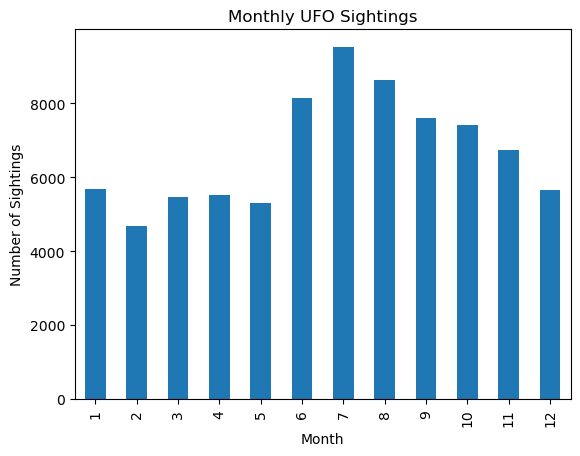

In [30]:
import matplotlib.pyplot as plt

monthly_counts = ufos.groupby('month').size()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Number of Sightings', title='Monthly UFO Sightings')
plt.show()

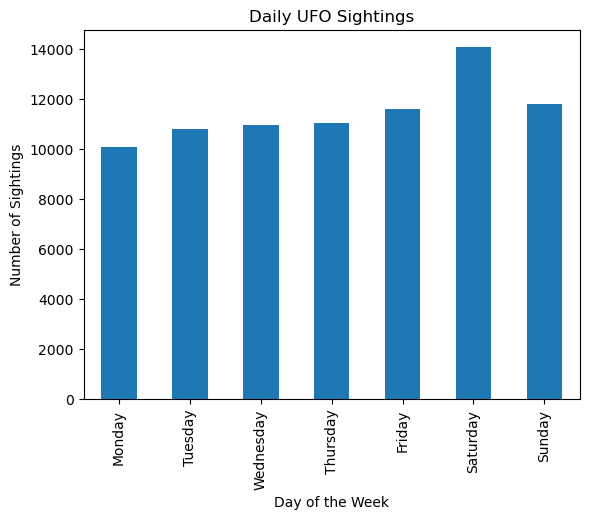

In [31]:
daily_counts = ufos.groupby(ufos['date_time'].dt.day_name()).size()
daily_counts = daily_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_counts.plot(kind='bar', xlabel='Day of the Week', ylabel='Number of Sightings', title='Daily UFO Sightings')
plt.show()

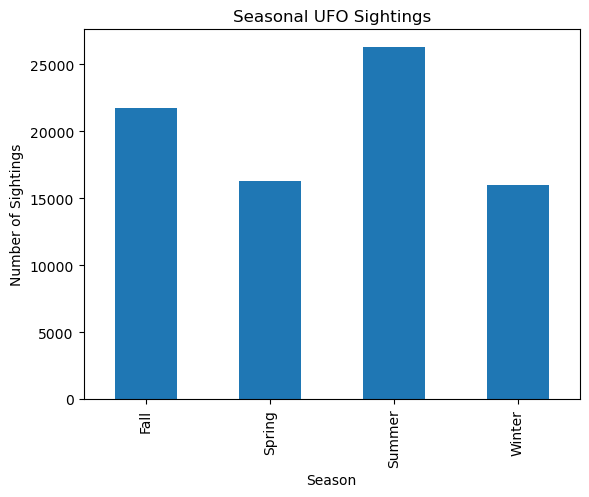

In [32]:
season_mapper = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
ufos['season'] = ufos['month'].map(season_mapper)

seasonal_counts = ufos.groupby('season').size()
seasonal_counts.plot(kind='bar', xlabel='Season', ylabel='Number of Sightings', title='Seasonal UFO Sightings')
plt.show()

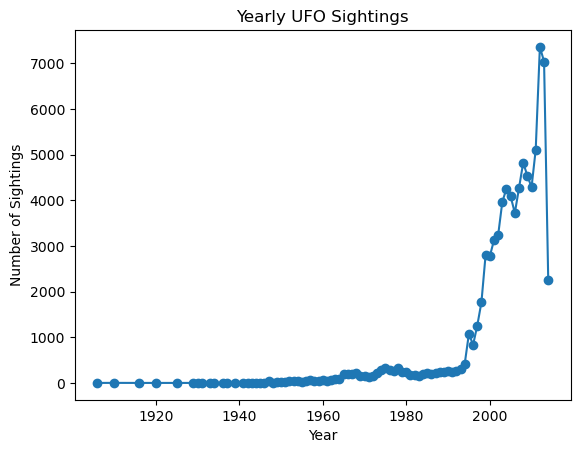

In [33]:
yearly_counts = ufos.groupby('year').size()
yearly_counts.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Sightings', title='Yearly UFO Sightings')
plt.show()

In [34]:
ufos['hour'] = ufos['date_time'].dt.hour

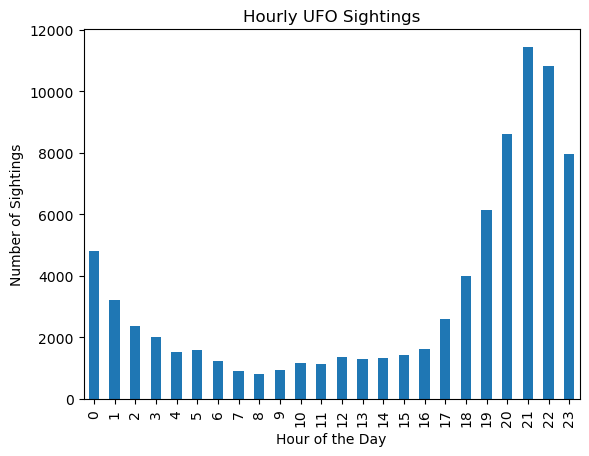

In [35]:
hourly_counts = ufos.groupby('hour').size()
hourly_counts.plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Sightings', title='Hourly UFO Sightings')
plt.show()

In [36]:
correlation = ufos['hour'].corr(ufos.groupby('hour').size())
print(f"Correlation between Hour and Number of Sightings: {correlation:.2f}")

Correlation between Hour and Number of Sightings: 0.13


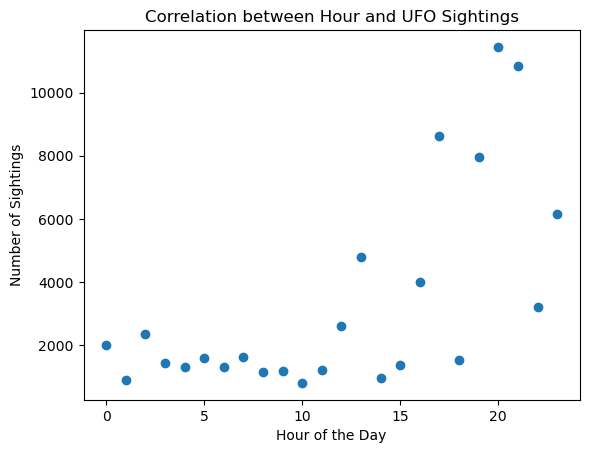

In [37]:
ufos = ufos.dropna(subset=['latitude', 'longitude'])
plt.scatter(ufos['hour'].unique(), ufos['hour'].value_counts())
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.title('Correlation between Hour and UFO Sightings')
plt.show()


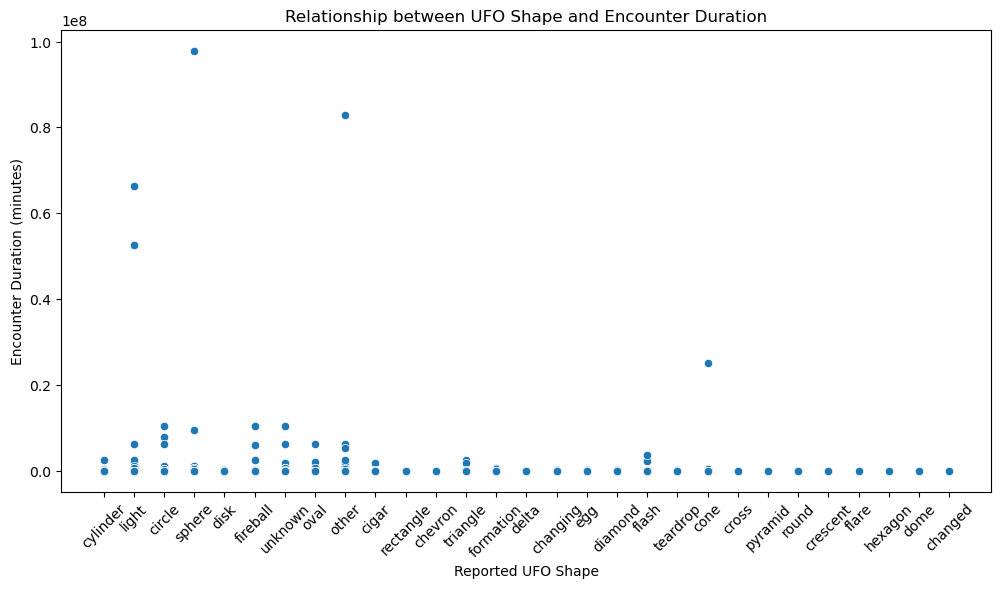

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ufo_shape', y='encounter_length', data=ufos)
plt.xlabel('Reported UFO Shape')
plt.ylabel('Encounter Duration (minutes)')
plt.title('Relationship between UFO Shape and Encounter Duration')
plt.xticks(rotation=45)  # Adjust for better readability
plt.show()


In [39]:
# Using Spearman correlation (non-parametric)
correlation = ufos['ufo_shape'].corr(ufos['encounter_length'], method='spearman')
print(f"Spearman Correlation: {correlation:.2f}")


Spearman Correlation: -0.01


In [40]:
shape_grouped = ufos.groupby('ufo_shape')['encounter_length'].mean()
print(shape_grouped)


ufo_shape
changed       3600.000000
changing      2079.513405
chevron        460.317174
cigar         1917.106830
circle        4768.092717
cone         82827.405063
crescent     18905.000000
cross          748.519313
cylinder      3426.512471
delta         2307.857143
diamond       1413.628625
disk          1460.431677
dome             2.000000
egg           1886.793281
fireball      4023.941484
flare           30.000000
flash         5330.289421
formation     1254.048547
hexagon        240.000000
light        13170.345373
other        20634.210977
oval          3898.586311
pyramid        120.000000
rectangle      683.571605
round          452.500000
sphere       21787.298238
teardrop       942.946000
triangle      1664.266397
unknown       5546.723104
Name: encounter_length, dtype: float64


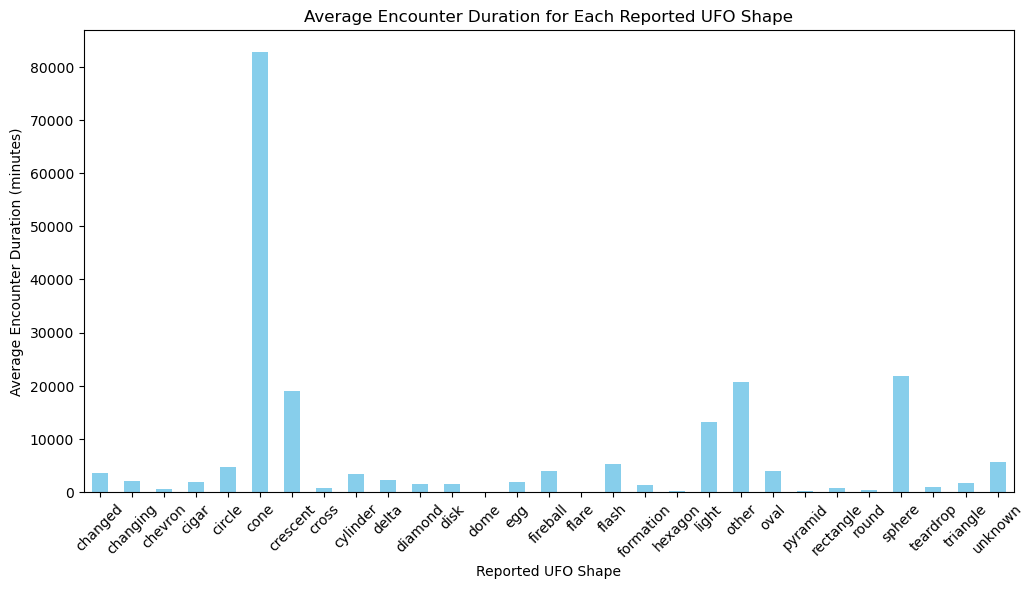

In [41]:
plt.figure(figsize=(12, 6))
shape_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Reported UFO Shape')
plt.ylabel('Average Encounter Duration (minutes)')
plt.title('Average Encounter Duration for Each Reported UFO Shape')
plt.xticks(rotation=45)
plt.show()

In [42]:
encounter_length_stats = ufos['encounter_length'].describe()
print(encounter_length_stats)


count    8.032800e+04
mean     9.017336e+03
std      6.202322e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: encounter_length, dtype: float64


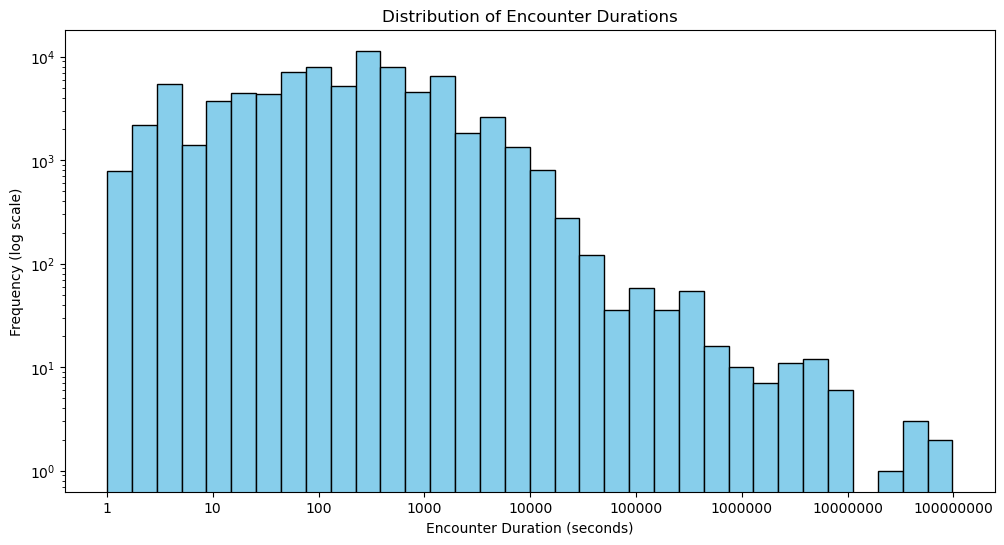

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Use a logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Increase the number of bins for better resolution
plt.hist(ufos['encounter_length'], bins=np.logspace(np.log10(1), np.log10(ufos['encounter_length'].max()), 35), color='skyblue', edgecolor='black')

plt.xscale('log')  # Use a logarithmic scale on the x-axis if needed
custom_ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # Adjust as needed based on your data
plt.xticks(custom_ticks, custom_ticks)
plt.xlabel('Encounter Duration (seconds)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Encounter Durations')
plt.show()


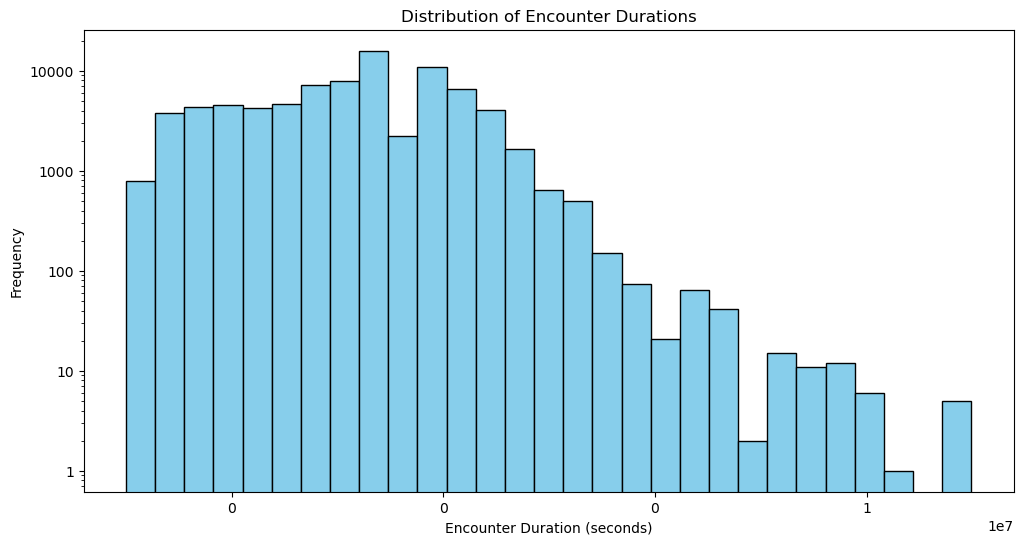

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))

# Use a logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Increase the number of bins for better resolution
bins = np.logspace(np.log10(1), np.log10(ufos['encounter_length'].max()), 30)
plt.hist(ufos['encounter_length'], bins=bins, color='skyblue', edgecolor='black')

plt.xscale('log')  # Use a logarithmic scale on the x-axis if needed

# Customize tick labels to show the full numbers without exponents
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.xlabel('Encounter Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Encounter Durations')
plt.show()





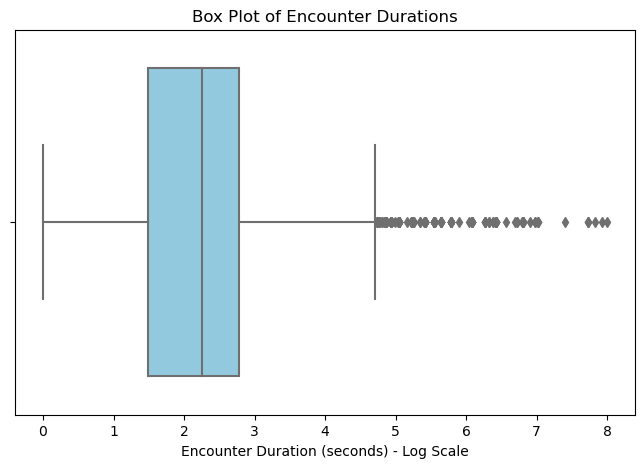

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# Add a small constant to avoid log(0) or log(negative)
ufos['log_encounter_length'] = np.log10(ufos['encounter_length'] + 1)

# Specify custom tick positions for the x-axis
#[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # Adjust as needed based on your data
plt.xticks(custom_ticks, labels=[f"{10**tick:.0f}" for tick in custom_ticks])

# Use a logarithmic scale on the x-axis for better visualization
sns.boxplot(x='log_encounter_length', data=ufos, color='skyblue')

# Customize tick labels to show the full numbers without exponents
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.xlabel('Encounter Duration (seconds) - Log Scale')
plt.title('Box Plot of Encounter Durations')
plt.show()




Number of outliers: 2


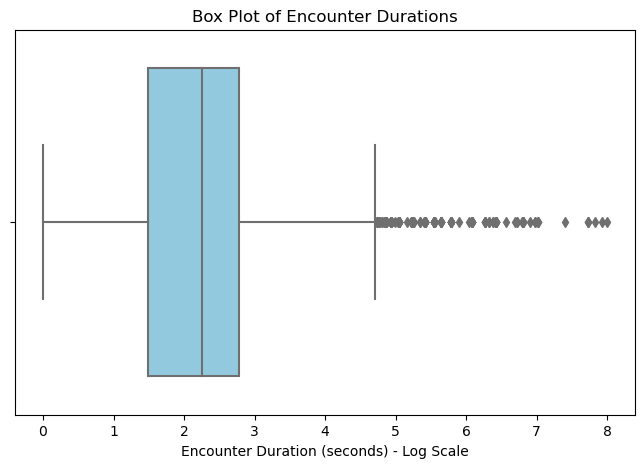

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# Add a small constant to avoid log(0) or log(negative)
ufos['log_encounter_length'] = np.log10(ufos['encounter_length'] + 1)

# Use a logarithmic scale on the x-axis for better visualization
boxplot = sns.boxplot(x='log_encounter_length', data=ufos, color='skyblue')

# Customize tick labels to show the full numbers without exponents
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.xlabel('Encounter Duration (seconds) - Log Scale')
plt.title('Box Plot of Encounter Durations')

# Retrieve the outliers from the boxplot
outliers = [flier.get_ydata() for flier in boxplot.get_children() if isinstance(flier, plt.Line2D)][0]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")
plt.show()



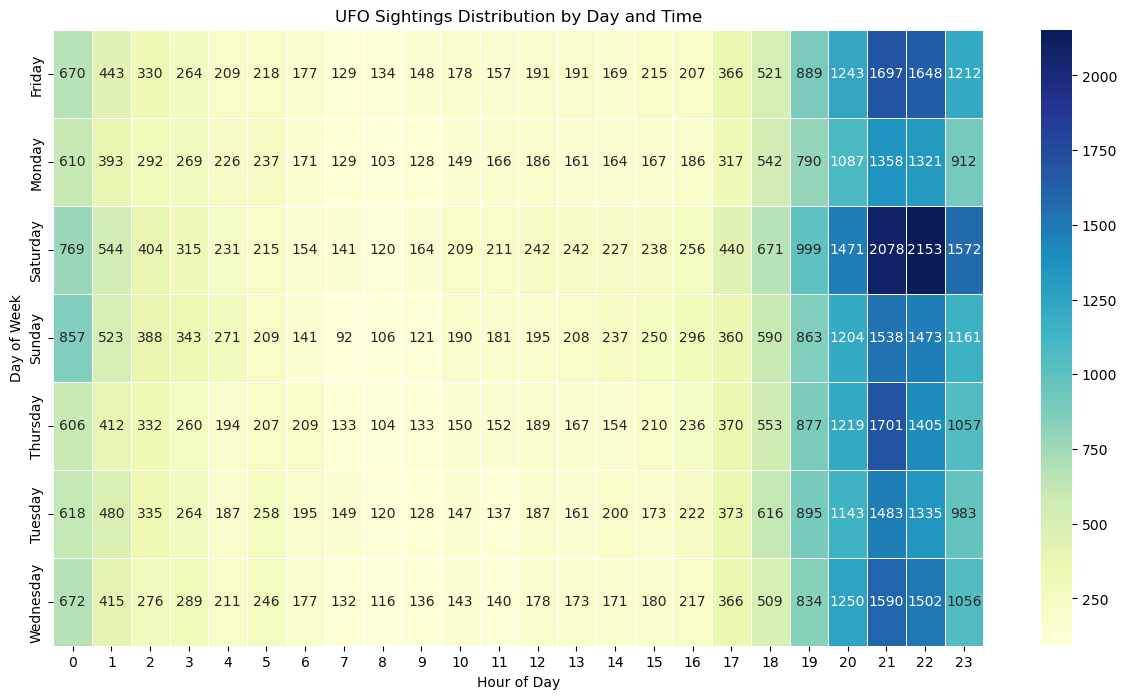

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'date_time' is in datetime format
ufos['date_time'] = pd.to_datetime(ufos['date_time'])

# Extract day and hour information
ufos['day'] = ufos['date_time'].dt.day_name()
ufos['hour'] = ufos['date_time'].dt.hour

# Create a pivot table for the heatmap
heatmap_data = ufos.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

plt.title('UFO Sightings Distribution by Day and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()


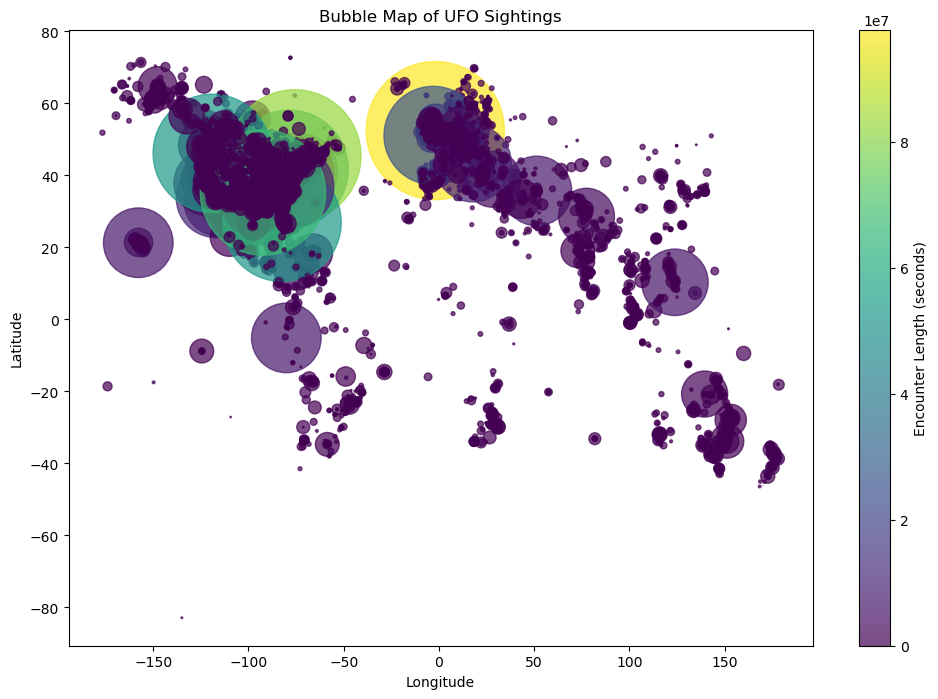

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'latitude', 'longitude', and 'encounter_length' columns
latitude = ufos['latitude']
longitude = ufos['longitude']
encounter_length = ufos['encounter_length']

# Scale the encounter length values for better visualization
sizes = np.sqrt(encounter_length)

# Create a scatter plot with bubble sizes
plt.figure(figsize=(12, 8))
plt.scatter(longitude, latitude, s=sizes, c=encounter_length, cmap='viridis', alpha=0.7)

# Add labels and a colorbar
plt.title('Bubble Map of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Encounter Length (seconds)')

plt.show()


In [49]:
# Assuming 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]

# Find the most common shape within the filtered subset
most_common_shape = filtered_ufos['ufo_shape'].mode().iloc[0]

print(f"The most common shape for entries in the specified latitude and longitude range is: {most_common_shape}")


The most common shape for entries in the specified latitude and longitude range is: light


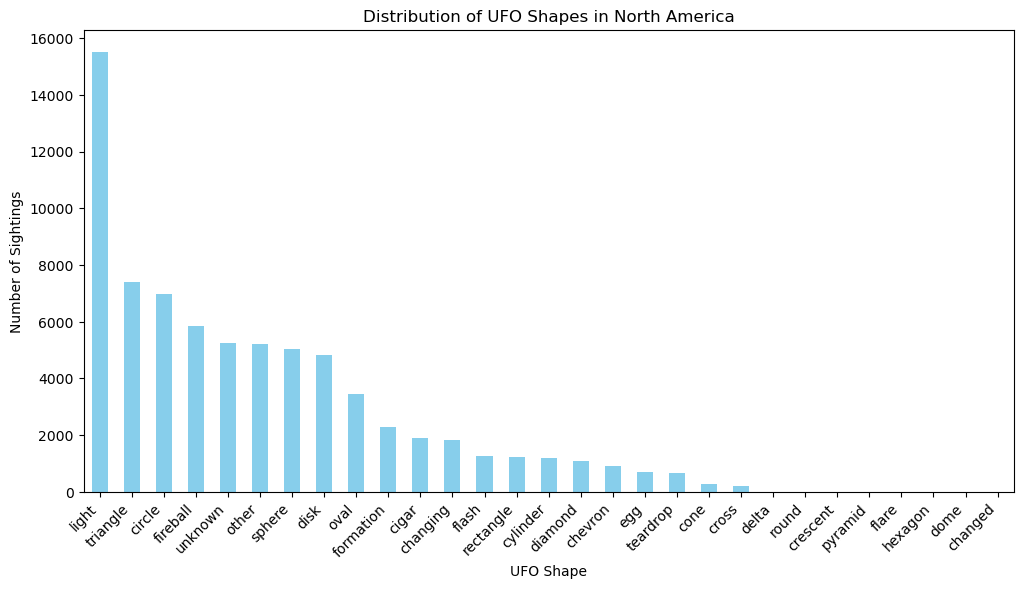

In [51]:
import matplotlib.pyplot as plt

# Assuming 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]

# Count the occurrences of each shape
shape_counts = filtered_ufos['ufo_shape'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
shape_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes in North America')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


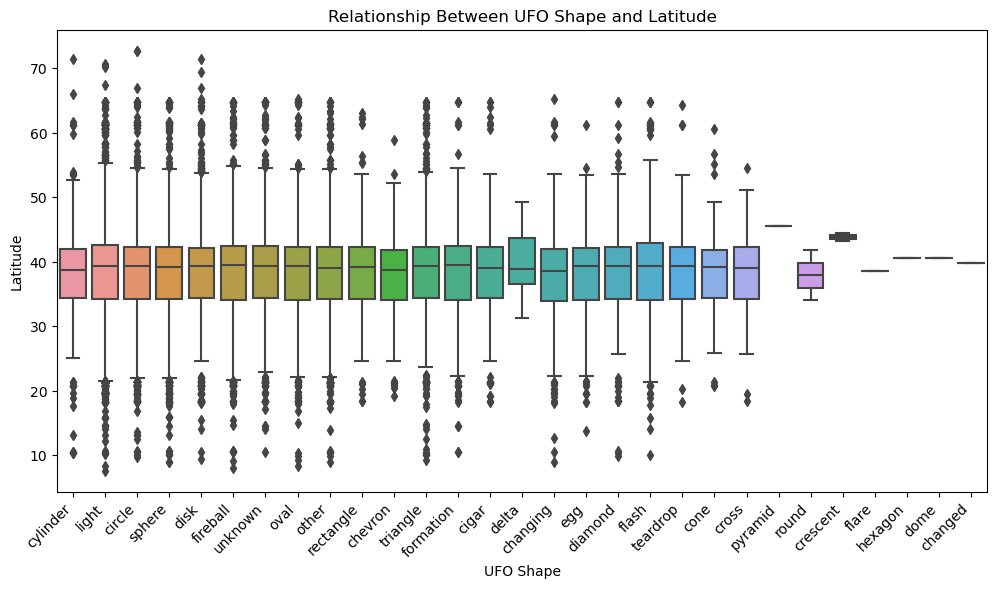

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'latitude', 'longitude', and 'ufo_shape' columns
filtered_ufos = ufos[(ufos['latitude'] >= 7) & (ufos['latitude'] <= 85) & (ufos['longitude'] >= -179) & (ufos['longitude'] <= -20)]

# Create a box plot to visualize the relationship between shape and latitude/longitude
plt.figure(figsize=(12, 6))
sns.boxplot(x='ufo_shape', y='latitude', data=filtered_ufos)
plt.title('Relationship Between UFO Shape and Latitude')
plt.xlabel('UFO Shape')
plt.ylabel('Latitude')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Assuming 'ufo_shape' column
ufos_with_shapes = ufos.dropna(subset=['ufo_shape'])  # Remove rows with missing shape data
ufo_shapes = ufos_with_shapes['ufo_shape']

# Use TF-IDF to convert shape strings into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ufo_shapes)

# Use TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_svd)
    distortions.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.show()

# Based on the elbow method, choose the optimal K (e.g., 3 or 4)
optimal_k = 3

# Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_svd)

# Add the cluster labels to the DataFrame
ufos_with_shapes['cluster'] = cluster_labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of UFO Shapes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


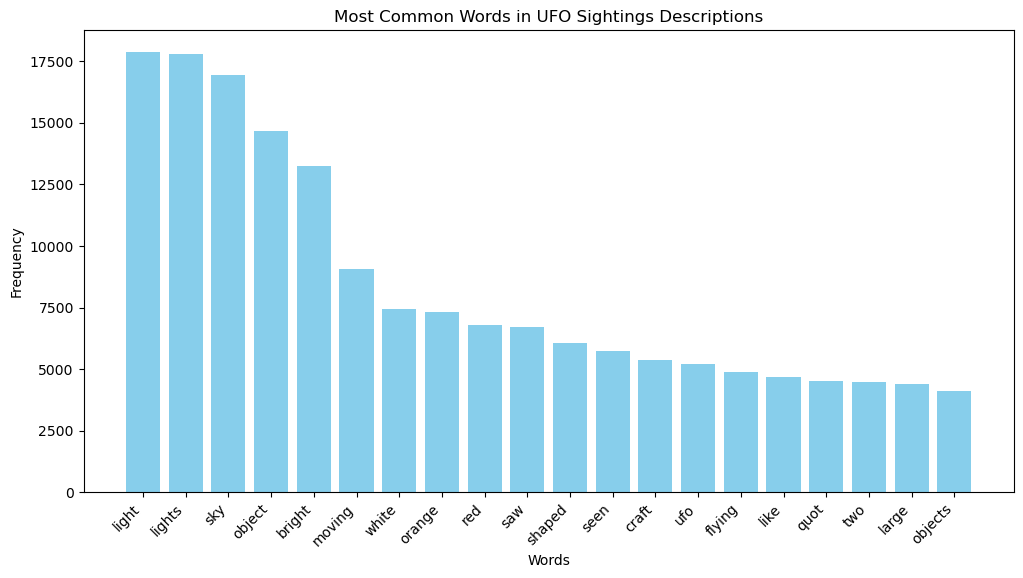

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


# Assuming 'description' column
descriptions = ufos['description'].dropna().str.lower()

# Combine all descriptions into a single string
all_descriptions = ' '.join(descriptions)

# Tokenize the words
tokens = word_tokenize(all_descriptions)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get word frequencies
word_freq = Counter(filtered_tokens)

# Plot the most common words
common_words = word_freq.most_common(20)  # Adjust the number of words to display
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in UFO Sightings Descriptions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Assuming 'description' column
descriptions = ufos['description'].dropna().str.lower()

# Combine all descriptions into a single string
all_descriptions = ' '.join(descriptions)

# Tokenize the words
tokens = word_tokenize(all_descriptions)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get word frequencies
word_freq = FreqDist(filtered_tokens)

# Specify the word you're interested in (e.g., "ufo")
target_word = "scary"
target_word_count = word_freq[target_word]

print(f"The word '{target_word}' appeared {target_word_count} times in the descriptions.")


The word 'scary' appeared 59 times in the descriptions.


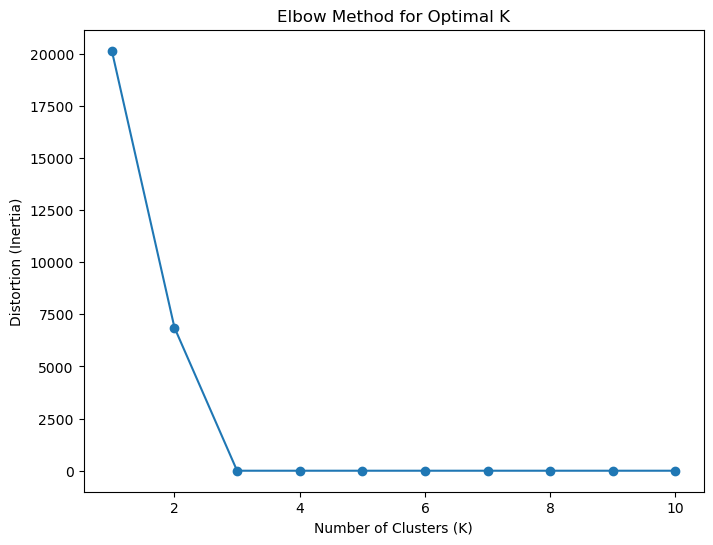

/var/folders/jz/b8ydxt_56qlcmx1pvfyjs5jc0000gn/T/ipykernel_10925/1241475476.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufos_with_shapes['cluster'] = cluster_labels


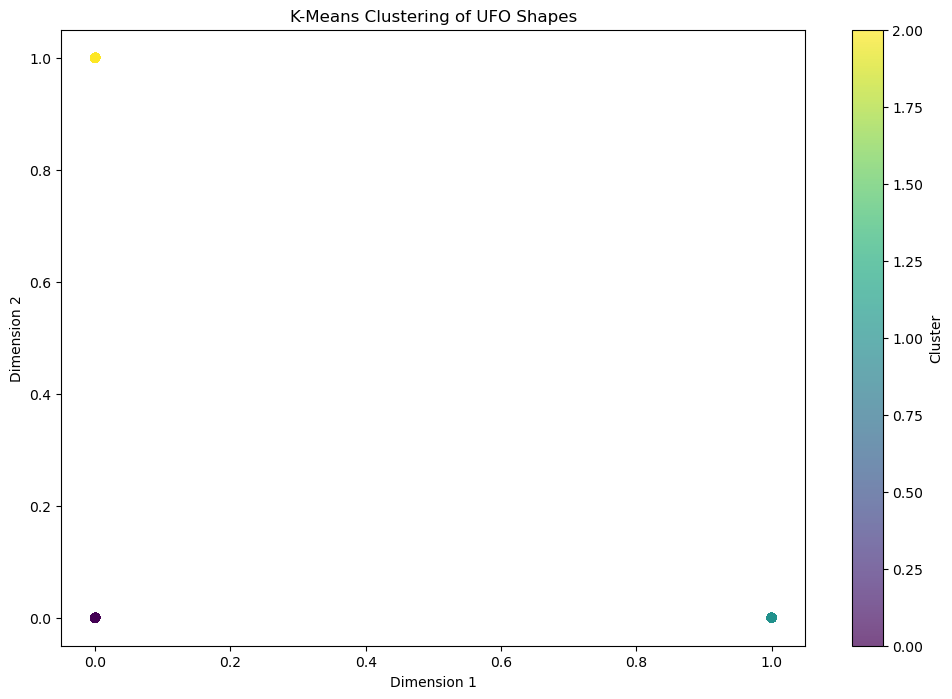

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Assuming 'ufo_shape' column
ufos_with_shapes = ufos.dropna(subset=['ufo_shape'])  # Remove rows with missing shape data
ufo_shapes = ufos_with_shapes['ufo_shape']

# Use TF-IDF to convert shape strings into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ufo_shapes)

# Use TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_svd)
    distortions.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.show()

# Based on the elbow method, choose the optimal K (e.g., 3 or 4)
optimal_k = 3

# Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_svd)

# Add the cluster labels to the DataFrame
ufos_with_shapes['cluster'] = cluster_labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of UFO Shapes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


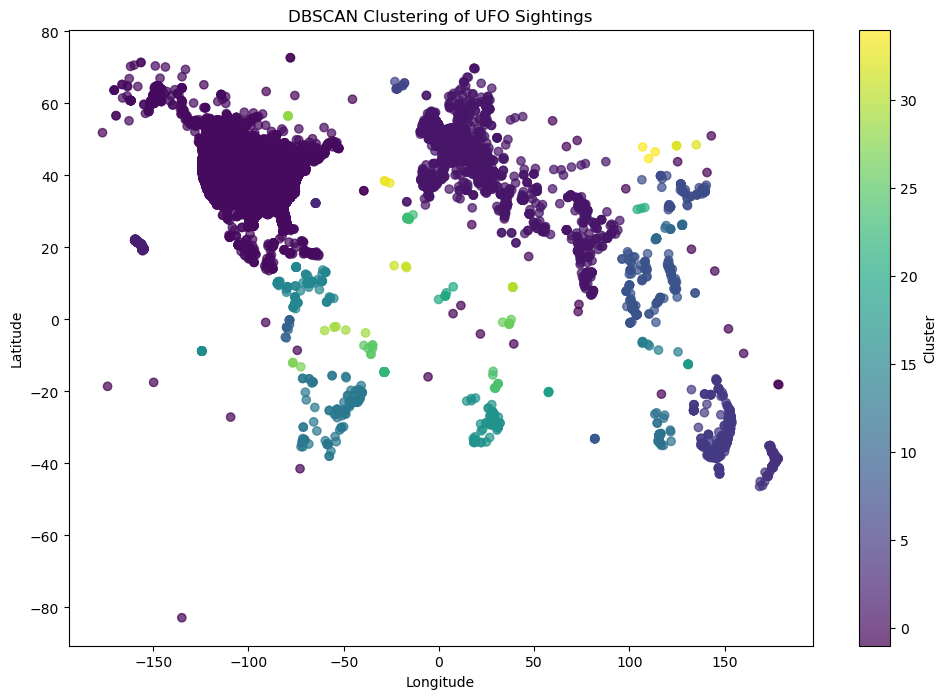

In [70]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'ufos' with columns 'latitude' and 'longitude'
coordinates = ufos[['latitude', 'longitude']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Apply DBSCAN
epsilon = 0.3  # Adjust this parameter based on the density of your data
min_samples = 3  # Adjust this parameter based on the minimum number of points you want in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
ufos['cluster'] = dbscan.fit_predict(coordinates_scaled)

# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(ufos['longitude'], ufos['latitude'], c=ufos['cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()
